In [1]:
import optimization_SPDC as opt
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax.scipy.optimize as jax_opt
import get_initialization_cond as init
import optimization_SPDC_gaussain_pump as opt_gauss

key = jax.random.PRNGKey(0)
np.random.seed(0)

In [3]:
# Initialize hyper parameters 
wi = -8
wf = 8
N = 501
vp = 0.1
l = 1
Np = 0.02
w = jnp.linspace(2*wi, 2*wf, 2*N)
x = jnp.linspace(wi, wf, N)
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N=N)
y_Ns = [1,2,3,5,10]

In [4]:
# Initialize parameters
init_params = [0,1,1,jnp.pi/3]
theta = init.get_initialization_array(init_params, vp, l, wi, wf, Np, method = "hermite", N = N)
gauss_theta = jnp.array([1,1,jnp.pi/3])

In [5]:
# Optimize with BFGS arbitrary and gaussian pump
opt_thetas = []
opt_thetas_gauss = []
for i in range(len(y_Ns)):
    opt_thetas.append((jax_opt.minimize(opt.get_loss, theta, args=(N, alpha, G, H, l, y_Ns[i]), method="BFGS")).x)
    opt_thetas_gauss.append((jax_opt.minimize(opt_gauss.get_loss, gauss_theta, args = (w, alpha, G, H, l, y_Ns[i]), method="BFGS")).x)

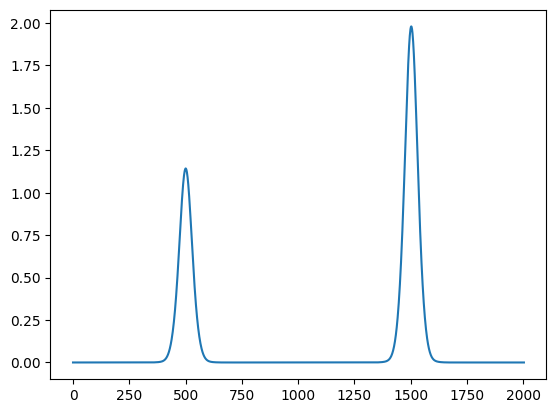

In [17]:
# Get the complex pump from the parameters
complex_optimal_pump = []
complex_optimal_gauss_pump = []
for i in range(len(opt_thetas)):
    complex_optimal_pump.append(opt.get_complex_array(opt_thetas[i]))
    complex_optimal_gauss_pump.append()

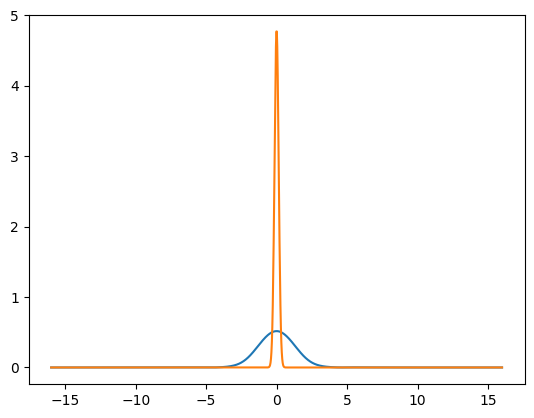

In [8]:
plt.plot(w,jnp.abs(opt.get_complex_array(opt_thetas[3])))
plt.plot(w,jnp.abs(2*opt_thetas_gauss[3][0]*jnp.exp(-(opt_thetas_gauss[3][1]*w)**2)*jnp.exp(1j*opt_thetas_gauss[3][-1])))

In [20]:
opt.get_observables(opt_thetas[2], N, alpha, G, H, l)[0], opt_gauss.get_observable(opt_thetas_gauss[2], w, alpha, G, H, l)[0]

(DeviceArray(3.0013232, dtype=float32), DeviceArray(2.1506016, dtype=float32))

# Give graphs to visualize the optimal pump for each N value

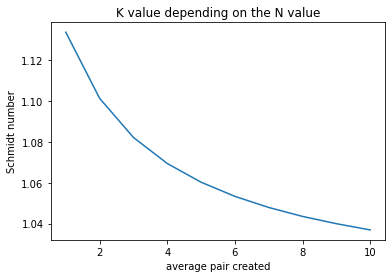

In [8]:
plt.title("K value depending on the N value")
plt.xlabel("average pair created")
plt.ylabel("Schmidt number")
plt.plot(y_Ns, jnp.sqrt(jnp.array(loss_on_K))+1)

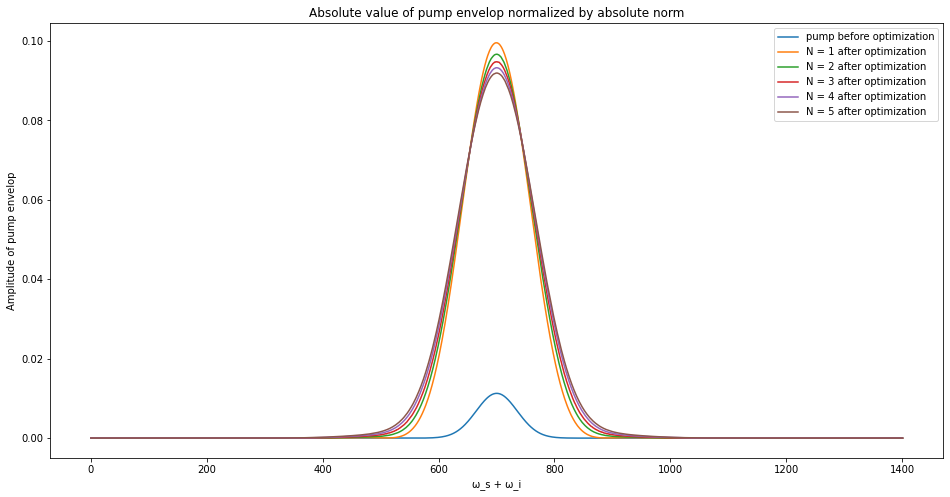

In [10]:
plt.figure(figsize = (16,8))
plt.title("Absolute value of pump envelop normalized by absolute norm")
plt.xlabel("ω_s + ω_i")
plt.ylabel("Amplitude of pump envelop")
plt.plot(jnp.abs(a_copy/sum(jnp.abs(a_copy))), label = "pump before optimization")
plt.plot(jnp.abs(complex_opt_as[0]/(jnp.linalg.norm(complex_opt_as[0]))), label = "N = 1 after optimization")
plt.plot(jnp.abs(complex_opt_as[1]/(jnp.linalg.norm(complex_opt_as[1]))), label = "N = 2 after optimization")
plt.plot(jnp.abs(complex_opt_as[2]/(jnp.linalg.norm(complex_opt_as[2]))), label = "N = 3 after optimization")
plt.plot(jnp.abs(complex_opt_as[3]/(jnp.linalg.norm(complex_opt_as[3]))), label = "N = 4 after optimization")
plt.plot(jnp.abs(complex_opt_as[4]/(jnp.linalg.norm(complex_opt_as[4]))), label = "N = 5 after optimization")
plt.legend()

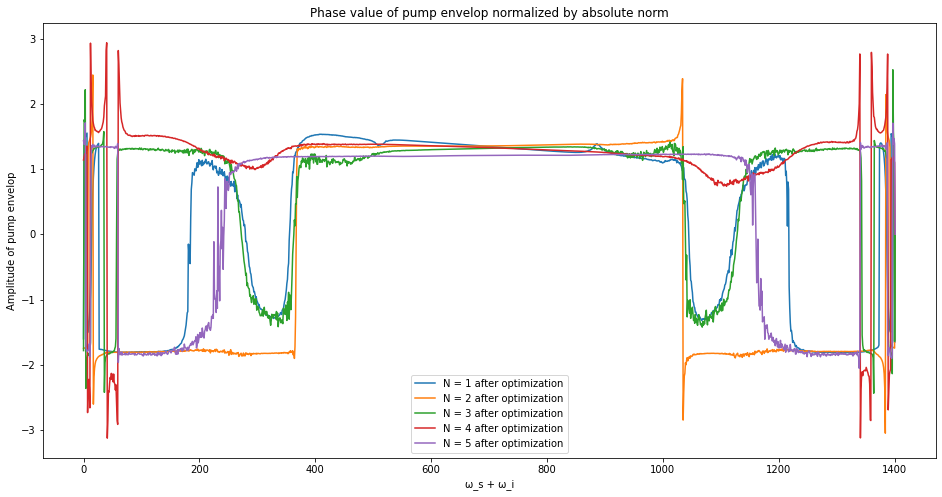

In [13]:
plt.figure(figsize = (16,8))
plt.title("Phase value of pump envelop normalized by absolute norm")
plt.xlabel("ω_s + ω_i")
plt.ylabel("Amplitude of pump envelop")
plt.plot(jnp.angle(complex_opt_as[0]/(jnp.linalg.norm(complex_opt_as[0]))), label = "N = 1 after optimization")
plt.plot(jnp.angle(complex_opt_as[1]/(jnp.linalg.norm(complex_opt_as[1]))), label = "N = 2 after optimization")
plt.plot(jnp.angle(complex_opt_as[2]/(jnp.linalg.norm(complex_opt_as[2]))), label = "N = 3 after optimization")
plt.plot(jnp.angle(complex_opt_as[3]/(jnp.linalg.norm(complex_opt_as[3]))), label = "N = 4 after optimization")
plt.plot(jnp.angle(complex_opt_as[4]/(jnp.linalg.norm(complex_opt_as[4]))), label = "N = 5 after optimization")
plt.legend()

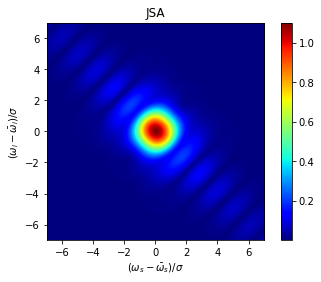

In [16]:
JSA = optimization_SPDC.get_JSA(x, a[-1], N, alpha, G, H, l)
fig, ax = plt.subplots()
im = ax.imshow(JSA, cmap = "jet", origin = "lower", extent = [x[0], x[N-1], x[0], x[N-1]])
ax.set_title("JSA")
ax.set_xlabel(r"$(\omega_{s}-\bar{\omega}_{s})/\sigma$")
ax.set_ylabel(r"$(\omega_{i}-\bar{\omega}_{i})/\sigma$")
plt.colorbar(im, orientation="vertical")
plt.show()

In [17]:
# Get N value and Schmidt number
print("N value: ", optimization_SPDC.get_observables(a[-1], N, alpha, G, H, l)[0])
print("Schmidt number: ", optimization_SPDC.get_observables(a[-1], N, alpha, G, H, l)[1])

(DeviceArray(10.000124, dtype=float32), DeviceArray(1.0368698, dtype=float32))

In [ ]:
# Save the pump envelop
jnp.save("optimized_pump_real_and_imag", jnp.array(a))